# Modul 1.2 Klimasystemet - Toboksmodellen
<img src="Bilder/toboksmodell.png">

I denne øvelsen ska vi gi en innføring i 2boksmodellen og hvordan vi ka bruke den til å beregne ændringer i jordens temperatur over tid. Toboksmodellen er en forenklet klimamodell. Den ser på hvordan energibalancen på jorden endrer seg utfra endringer i de ulike strålingspådrivene. I figuren over ser dere at man ser på en balanse mellom stråling som går inn og ut på toppen av atmosfæren (TOA), samt de energiovergangene vi har på grensen mellom atmosfæren og det øverste laget i havet, samt at det går noe varme fra havets blandingslag til dyphavet. 

De som ønsker å forstå hvordan man kommer frem til formlene for beregning av temperaturendring som følge av endringer i strålingspådrivet anbefales å lese kompendiet *Climate Sensitivity*. Der vises det hvordan vi kommer frem til likningene under. Disse likningene er kodet og ligger i en Python-fil i mappen deres. Filen heter toboks.py.

$c_{mix}$ og $c_{deep}$ forteller om varmekapasiteten til overflatelaget i havet og i dyphavet. $\Delta T_s$ gir endringer i overflatetemperaturer, mens $\Delta T_o$ endringer i temperaturen i dyphavet. $\lambda$ er tilbakekoblingseffekter (*climate feedbaks*), og $\gamma$ varmeopptak i havet.

$$\begin{align}
c_{mix}\dfrac{d\Delta T_s}{dt}&=\Delta Q-\lambda \Delta T_s -\gamma (\Delta T_s -\Delta T_0) \\
c_{deep}\dfrac{d\Delta T_o}{dt}&=\gamma (\Delta T_s - \Delta T_o)
\end{align}$$


In [1]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen


## Sette op ToBoksModellen
For at sette opp modellen, må vi først hente inn data for de ulike strålingspådriv og beregne det totale pådriv ($\Delta$Q). Dernæst må vi bestemme hvilke ulike tilbagekoblingsfaktorer ($\gamma$) som modellen ska ta med. Dette bruker 2boksmodellen som "input" for å lage beregninger.

### Bestem strålingspådrivene

I denne øvelsen tar vi utgangspunkt i historisk data for perioden 1750-2011 som er basert på observationer. Her ser vi på følgene strålingspådriv:

- drivhusgasser 
- solinnstråling
- vulkanisme
- arealbruk 
- aerosoler (menneskeskapte)

Det totale strålingspådriv ($\Delta$Q) er givet ved:

$$\begin{align}
\Delta Q=\Delta Q_{drivhus} + \Delta Q_{sol} + \Delta Q_{vulkan} + \Delta Q_{arealbruk} + \Delta Q_{aerosoler} 
\end{align}$$


In [2]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('historical.csv',index_col = 0,sep=',',encoding = "utf-8")

Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. Sett parameterne under til 1 eller 0, alt ettersom du ønsker å ha dem med eller ei. I koden under lages en ny dataramme som inneholder totalt pådriv med disse faktorene.

In [3]:
# --------------------
# Forcing switches [n=1 off=0]
# --------------------
switch_ghg=1     # Greenhouse gas forcing on=1 off=0
switch_solar=1   # Solar forcing on=1 off=0
switch_volc=1    # Volcanic forcing on=1 off=0
switch_land=1    # Landuse forcing on=1 off=0
switch_aero=1    # Pollution particle forcing on=1 off=0

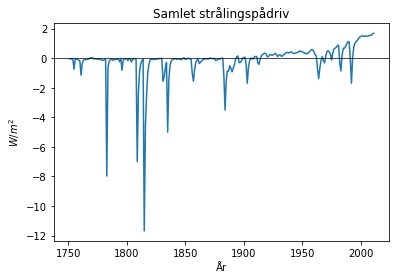

In [4]:
# Beregn og plot det totale strålingspådriv
total_forcing = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']
total_forcing.plot(title="Samlet strålingspådriv",ylabel="$W/m^2$")
plt.axhline(y=0, linewidth=0.7, color="black")

### Tilbakekoblingsfaktorer (climate feedbacks)

In [5]:
# CMIP5 values
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other=0.0       # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

In [6]:
# Deep ocean heat uptake efficency [Wm-2K-1]
# CMIP3 values
gamma=-0.69  # best guesses [-1 to -0.5]

In [7]:
radiative_forcing = total_forcing.to_numpy() # konverter dataframe til data-array

## Temperaturendringer for perioden 1750-2011
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av hvilke strålingspådriv vi har slått på, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til havet. 

In [8]:
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

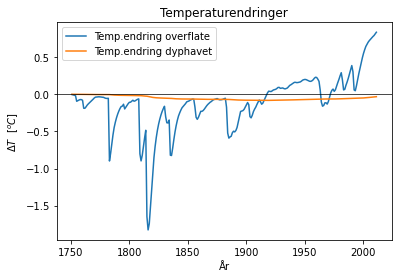

In [9]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer som pådrivet
temp['Temp.endring overflate']=Ts
temp['Temp.endring dyphavet']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")
plt.axhline(y=0, linewidth=0.7, color="black")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e8bcb2c10>,
      dtype=object)

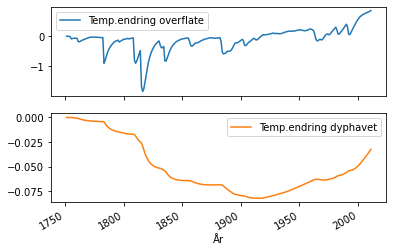

In [10]:
# samme plot men i hver sin figur
temp.plot(subplots=True)

## Øvelser

Nu har dere fået et innblikk i hvordan modellen fungerer. Bruk hva dere har lært til at undersøke følgene:
    
1. Beregn og plot endringen i overflatetemperatur (*Ts*) relativt til perioden 1850-1900 (*pre-industrial period*)
    - TIPS: se notebook fra modul0
2. Hvor mye har overflatetemperaturen (*Ts*) i år 2011 endret sig i forhold til perioden 1850-1900? 

3. Hva er den primære årsakken til denne endringen? Finn en måte å illustrere dette på.



### BONUS: Finn selv på noe å undersøke med modellen
Presenter efterfølgende for resten af gruppen

### Løsningsforslag

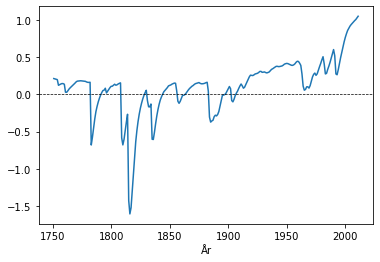

In [11]:
#### 1
dT1850_1900 = temp['Temp.endring overflate'].loc[1850:1900] #pre-industrial

Tanom =  temp['Temp.endring overflate']- dT1850_1900.mean() # temp. anomaly

# make plot
Tanom.plot()
plt.axhline(y=0, linewidth=0.7, color="black", ls='--')


Temperature change at  2011 : 1.053186800918653


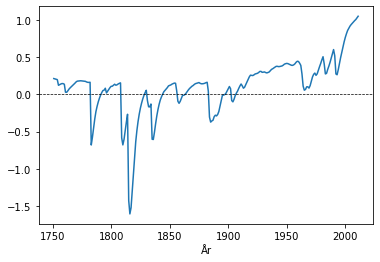

In [64]:
#### 2

# bruk `loc` funktionen til å finne bestemt år

year = 2011
Tloc = Tanom.loc[year]
print('Temperature change at year ', year, ':', Tloc)


3) 
For å finne årsakken til denne endringen må vi se på effekten av de ulike strålingspådrivene. Dette ka gjøres manuelt ved å slå av/på switches for strålingspådrivene og deretter "kjøre" modellen. Vi ka også brukke en løkke for at gjøre det raskere (men og mer avansert). 

Vi ser at frem til år 1900 var det primært vulkanisme som styrte temperaturen og har en afkjøllene effekt. Men fra ca. 1900 og frem tar drivhusgassene over og giver en gradvis oppvarming. 

Beregner temp. endring for strålingspådriv: drivhusgasser
Beregner temp. endring for strålingspådriv: solinnstråling
Beregner temp. endring for strålingspådriv: vulkanisme
Beregner temp. endring for strålingspådriv: arealbruk
Beregner temp. endring for strålingspådriv: aerosoler


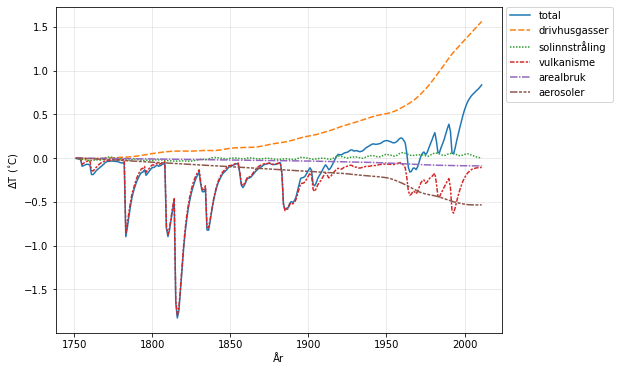

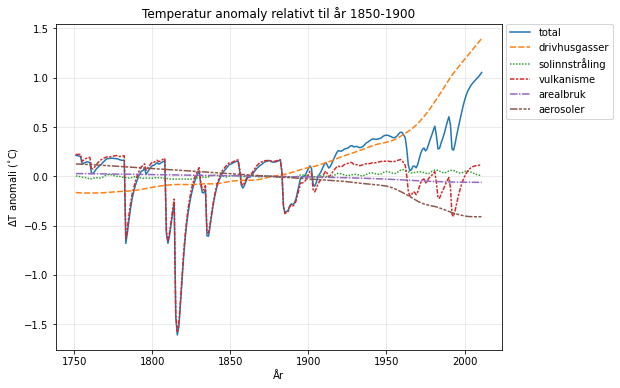

In [132]:
Ts = pd.DataFrame(index=df.index, columns=df.columns) # vi lager en ny dataramme som har samme struktur som pådrivet
To = pd.DataFrame(index=df.index, columns=df.columns) # vi lager en ny dataramme som har samme struktur som pådrivet

dims = df.columns.size # 

for index, Q in df.iteritems(): # loop over radiative forcings
    
    print("Beregner temp. endring for strålingspådriv:", Q.name)
    
    radiative_forcing = Q.to_numpy()
    Ts[Q.name], To[Q.name] = calculate_temp_anomalies(radiative_forcing, 
                                                      lambda_sum, 
                                                      gamma) # kaller opp funksjonen som regner ut temperaturendringene 
# beregn det totale endring
Ts['total'] = Ts.sum(axis='columns')

# reorder dataframe
cols = Ts.columns.tolist()
cols = cols[-1:] + cols[:-1]
Ts = Ts[cols]  

# beregn anomali 
dT1850_1900 = Ts.loc[1850:1900] #pre-industrial
Tanom =  Ts - dT1850_1900.mean() # temp. anomaly

# make plot
import seaborn as sns # make fancier plots

plt.figure(figsize=(8,6))
sns.lineplot(data = Ts)
plt.ylabel("$\Delta$T ($^{\circ}$C)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) # place the legend outside the figure/plot

# og plot anomalier
plt.figure(figsize=(8,6))
sns.lineplot(data = Tanom)
plt.ylabel("$\Delta$T anomali ($^{\circ}$C)")
plt.title("Temperatur anomaly relativt til år 1850-1900")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) # place the legend outside the figure/plot